In [1]:
import pandas as pd

# Veriyi yükleme
file_path = "spambase_csv.csv"  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# İlk birkaç satırı görüntüleme
print(df.head())

# Veri hakkında genel bilgi
print(df.info())

# Eksik değerleri kontrol etme
print("Eksik değerler:\n", df.isnull().sum())

# İstatistiksel özet
print(df.describe())


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

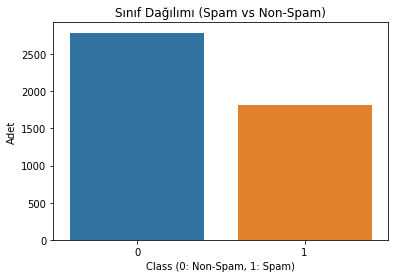

In [2]:
# Hedef değişkenin sınıf dağılımı
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.title("Sınıf Dağılımı (Spam vs Non-Spam)")
plt.xlabel("Class (0: Non-Spam, 1: Spam)")
plt.ylabel("Adet")
plt.show()

In [3]:
# Temel öznitelik dağılımı (ilk birkaç kolon için)
df.iloc[:, :-1].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.0,0.0,0.00,4.54
word_freq_address,4601.0,0.213015,1.290575,0.0,0.0,0.0,0.00,14.28
word_freq_all,4601.0,0.280656,0.504143,0.0,0.0,0.0,0.42,5.10
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.0,0.0,0.00,42.81
word_freq_our,4601.0,0.312223,0.672513,0.0,0.0,0.0,0.38,10.00
word_freq_over,4601.0,0.095901,0.273824,0.0,0.0,0.0,0.00,5.88
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.0,0.0,0.00,7.27
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.0,0.0,0.00,11.11
word_freq_order,4601.0,0.090067,0.278616,0.0,0.0,0.0,0.00,5.26
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.0,0.0,0.16,18.18


Sıfır oranları en yüksek 10 özellik:
word_freq_3d            0.989785
word_freq_table         0.986307
word_freq_parts         0.981960
word_freq_font          0.974571
word_freq_cs            0.967833
word_freq_conference    0.955879
word_freq_857           0.955444
word_freq_415           0.953271
word_freq_telnet        0.936318
word_freq_project       0.928928
dtype: float64


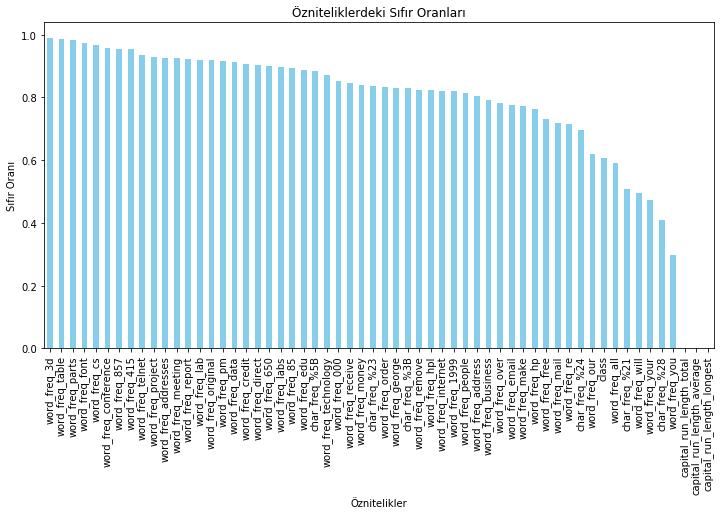

In [4]:
# Her sütundaki sıfır oranını hesaplama
zero_ratios = (df == 0).sum() / len(df)

# Sıfır oranlarına göre sıralama
zero_ratios = zero_ratios.sort_values(ascending=False)

# İlk 10 sütunu gösterme
print("Sıfır oranları en yüksek 10 özellik:")
print(zero_ratios.head(10))

# Sıfır oranlarını görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
zero_ratios.plot(kind='bar', color='skyblue')
plt.title("Özniteliklerdeki Sıfır Oranları")
plt.ylabel("Sıfır Oranı")
plt.xlabel("Öznitelikler")
plt.show()


In [5]:
# %95'ten fazla sıfır oranına sahip sütunları bulma
high_zero_cols = zero_ratios[zero_ratios > 0.95].index

# Bu sütunları veri setinden çıkarma
df_cleaned = df.drop(columns=high_zero_cols)

print(f"Çıkarılan sütunlar: {list(high_zero_cols)}")
print(f"Yeni veri setinin boyutu: {df_cleaned.shape}")

Çıkarılan sütunlar: ['word_freq_3d', 'word_freq_table', 'word_freq_parts', 'word_freq_font', 'word_freq_cs', 'word_freq_conference', 'word_freq_857', 'word_freq_415']
Yeni veri setinin boyutu: (4601, 50)


In [6]:
# Yeni veri setinin özet istatistikleri
print(df_cleaned.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_our  \
count     4601.000000        4601.000000    4601.000000    4601.000000   
mean         0.104553           0.213015       0.280656       0.312223   
std          0.305358           1.290575       0.504143       0.672513   
min          0.000000           0.000000       0.000000       0.000000   
25%          0.000000           0.000000       0.000000       0.000000   
50%          0.000000           0.000000       0.000000       0.000000   
75%          0.000000           0.000000       0.420000       0.380000   
max          4.540000          14.280000       5.100000      10.000000   

       word_freq_over  word_freq_remove  word_freq_internet  word_freq_order  \
count     4601.000000       4601.000000         4601.000000      4601.000000   
mean         0.095901          0.114208            0.105295         0.090067   
std          0.273824          0.391441            0.401071         0.278616   
min          

In [9]:
print(df.head())
print(df.columns)

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [10]:
# Öznitelik ve etiketleri ayıralım
X = df.drop('class', axis=1)  # 'class' sütununu çıkartıyoruz
y = df['class']  # Etiketlerin olduğu sütun

# Veriyi eğitim ve test olarak bölelim
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli kurma ve eğitme (örneğin, bir RandomForestClassifier kullanarak)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Modeli başlatıp eğitelim
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test verisiyle tahmin yapalım
y_pred = model.predict(X_test)

# Sonuçları değerlendirelim
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.91      0.94       390

    accuracy                           0.95       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.01, 100),  # Uniform dağılımda değerler
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression(max_iter=1000)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print("En iyi parametreler: ", random_search.best_params_)

En iyi parametreler:  {'C': 5.6593962733270455, 'solver': 'liblinear'}


In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(scale_pos_weight=1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost modelini oluşturun
xgb_model = XGBClassifier(random_state=42)

# Parametre  grid'ini oluşturun
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5],
}

# GridSearchCV kullanarak parametre optimizasyonu yapın
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırın
print(f"Best Parameters: {grid_search.best_params_}")

# En iyi model ile tahmin yapın
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# En iyi modeli kullanarak tahmin yapın
y_pred = best_model.predict(X_test)

# Performans raporunu yazdırın
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix'i yazdırın
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       531
           1       0.97      0.93      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921

Confusion Matrix:
 [[521  10]
 [ 26 364]]
